In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

In [2]:
df = pd.read_csv('Data/clean_data.csv')


# Analyze reactions


In [3]:
df['reaction_count'].describe()

count       90.000000
mean      2382.011111
std       3062.088303
min         64.000000
25%        621.500000
50%       1140.500000
75%       2742.750000
max      16443.000000
Name: reaction_count, dtype: float64

<Axes: title={'center': 'Tỉ lệ các loại react'}>

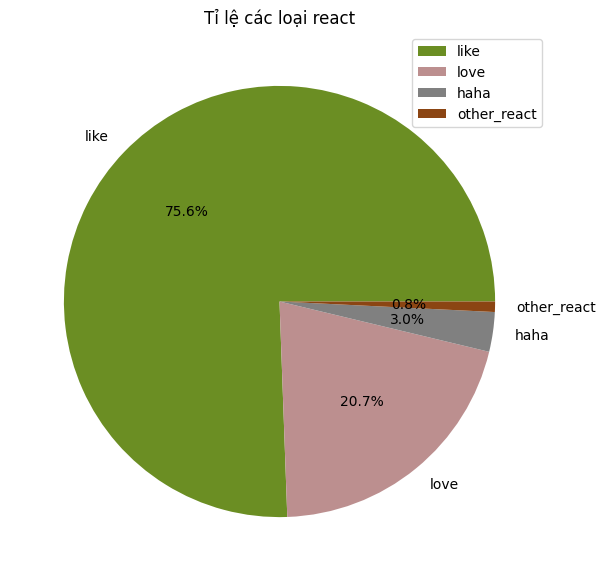

In [4]:
# tỉ lệ các react 
# other_reacts = care + wow + sad + angry
df['other_react'] = df['care'] + df['wow'] + df['sad'] + df['angry']
react_sum = df[['like', 'love', 'haha',  'other_react']].sum()
react_sum.plot(kind='pie', figsize=(7,7),legend=True, autopct='%1.1f%%',
                colors=['olivedrab', 'rosybrown', 'gray', 'saddlebrown'],
                title='Tỉ lệ các loại react')

Text(0.5, 1.0, 'share count')

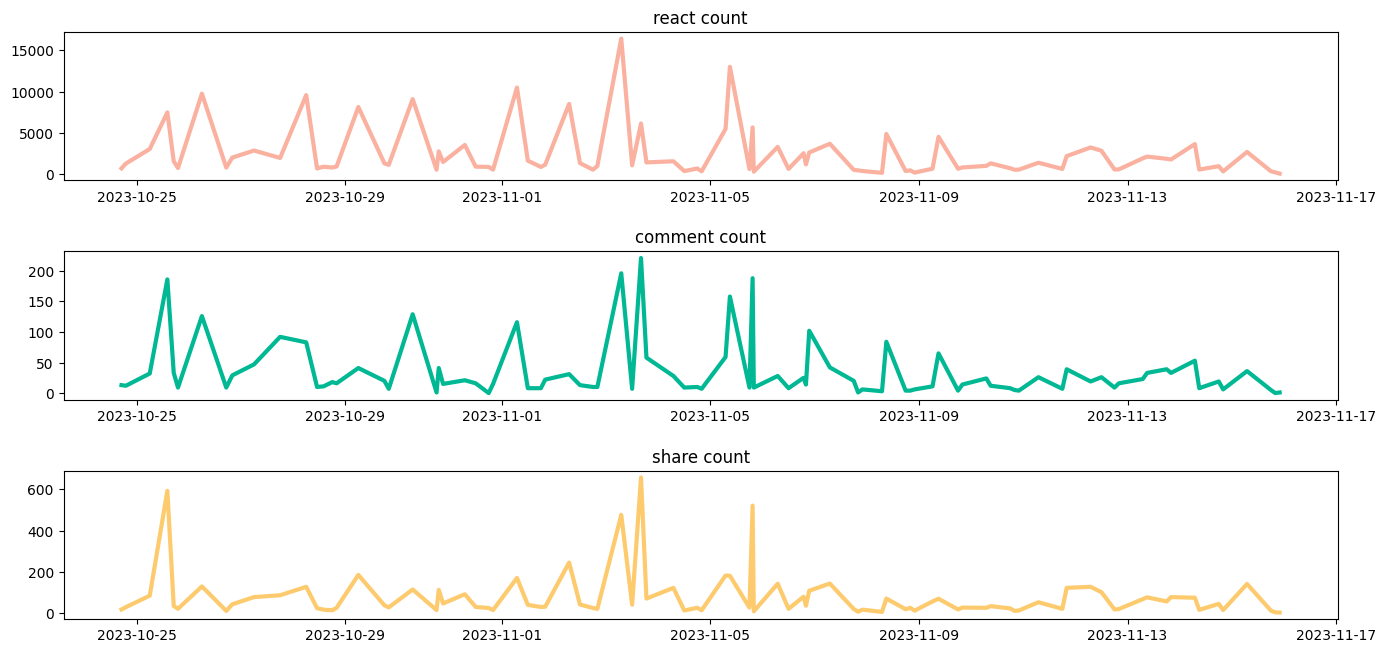

In [5]:
# Tương quan react, share, comment count 
plot_objects = plt.subplots(nrows=3, ncols=1, figsize=(14, 7))
df['time'] = pd.to_datetime(df['time'])

fig, (ax1, ax2,ax3) = plot_objects
fig.tight_layout(pad = 3.0)

plot_objects
ax1.plot(df['time'],df['reaction_count'], c='#fab1a0', linewidth = 3)
ax1.set_title("react count")
ax2.plot(df['time'], df['comments'], c= '#00b894', linewidth = 3)
ax2.set_title("comment count")
ax3.plot(df['time'], df['shares'], c = '#fdcb6e', linewidth = 3)
ax3.set_title("share count")


<Axes: title={'center': 'Trung bình react và comment theo ngày'}, xlabel='date'>

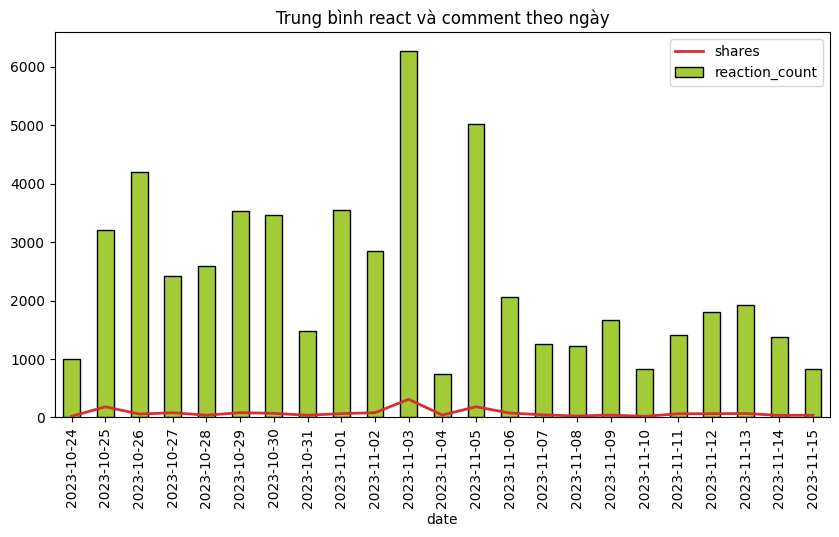

In [6]:
#Phân tích lượng react trung binh theo ngày

df.groupby(['date'])['shares'].mean().plot( color='#d63031', linewidth=2.0, legend=True)  

df.groupby(['date'])['reaction_count'].mean().plot(kind = 'bar', figsize = (10,5), 
                                            color = '#A3CB38', edgecolor = 'black', legend=True, title = 'Trung bình react và comment theo ngày')                                        



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3516\3803835963.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['exact_time'] = pd.to_datetime(df['exact_time'])


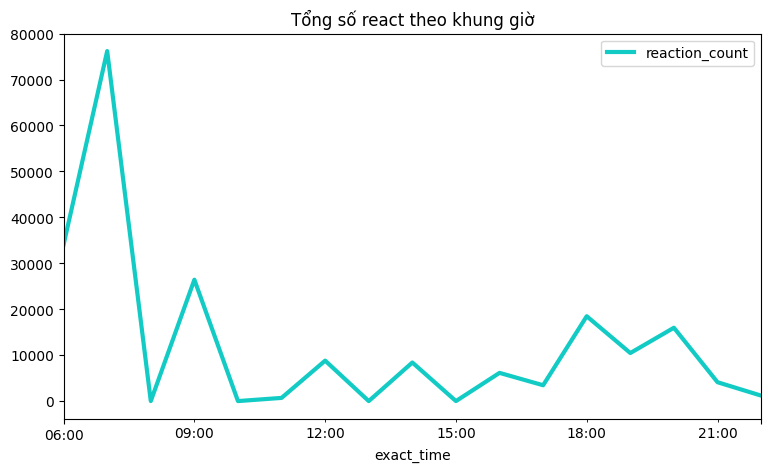

In [7]:
# Phân tích lượng react khung giờ

df['exact_time'] = pd.to_datetime(df['exact_time'])
a1 = df.set_index('exact_time').resample('H')[['reaction_count']].sum().plot(
    color = '#12CBC4', figsize=(9,5), linewidth = 3, title = 'Tổng số react theo khung giờ')

<Axes: title={'center': 'Tương tác của các bài viết'}>

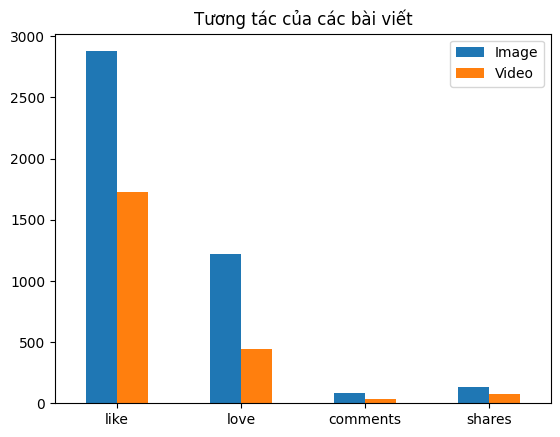

In [8]:
# So sánh react của những bài viết hình ảnh với bài viết video
#df_cat = pd.melt(df, id_vars='video_id', value_vars=['like', 'love', 'other_react', 'comments', 'comments'])
df_cat = df.groupby(['video_id'])[['like','love', 'comments','shares']].mean()
df_cat = df_cat.transpose()
df_cat.columns = ["Image", "Video"]
df_cat.plot.bar( rot = 0, title = 'Tương tác của các bài viết')

In [9]:
#bài viết có react max
df.iloc[df['reaction_count'].idxmax()]

post_id                                             725964999560631
text              Sarina Koga 🇯🇵 & Ajcharaporn 🇹🇭\n\nBoth player...
time                                            2023-11-03 07:00:09
video_id                                                        0.0
comments                                                        196
shares                                                          476
comments_full     [{'comment_id': '1330513270919192', 'comment_u...
reactors          [{'name': 'Armmy Awirut', 'link': 'https://fac...
reaction_count                                                16443
with                                                              0
image_id                                                        1.0
header                                                    No header
date                                                     2023-11-03
exact_time                                      2023-12-05 07:00:09
like                                            

# Analyze Comment

In [10]:
#bài viết có comment max
df.iloc[df['comments'].idxmax()]

post_id                                             726263556197442
text                             WE HOPE SHE’S OKAY 😳 #volleyball 🏐
time                                            2023-11-03 16:05:20
video_id                                                        1.0
comments                                                        221
shares                                                          658
comments_full     [{'comment_id': '1052471199118987', 'comment_u...
reactors          [{'name': 'วรวุฒิ โพธิ์สาวงษ์', 'link': 'https...
reaction_count                                                 6141
with                                                              0
image_id                                                        0.0
header                                                    No header
date                                                     2023-11-03
exact_time                                      2023-12-05 16:05:20
like                                            

In [11]:
df['comments'].describe()

count     90.000000
mean      34.455556
std       47.081130
min        0.000000
25%        8.000000
50%       16.000000
75%       35.250000
max      221.000000
Name: comments, dtype: float64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3516\3440107791.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['comments'],


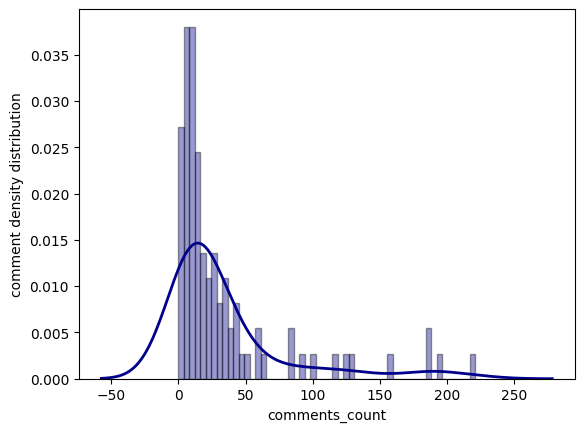

In [12]:
# hàm phân bố lượng comment, sử dụng phương pháp kde giúp xây dựng hình dạng phân phối của dữ liệu
sns.distplot(df['comments'], 
             hist = True, 
             bins=int(270/5),
             kde = True,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2})

# Khai báo tiêu đề cho trục x
plt.xlabel('comments_count')
# Khai báo tiêu đề cho trục y
plt.ylabel('comment density distribution')
plt.show()

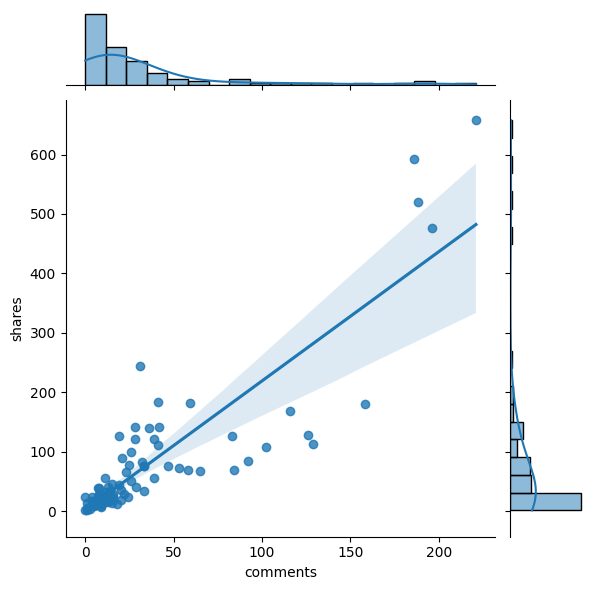

In [13]:
# mối quan hệ giữa comment và share
sns.jointplot(x= 'comments', y= 'shares', kind= 'reg', data= df[['comments','shares']])

<Axes: xlabel='reaction_count', ylabel='comments'>

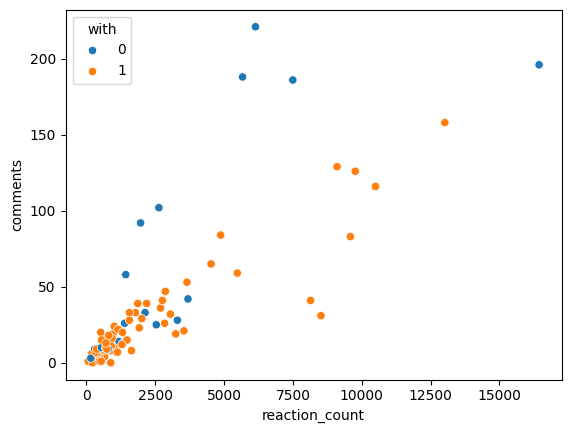

In [14]:
# mối quan hệ giữa comment và react, lọc với with
sns.scatterplot(data = df[['reaction_count', 'comments', 'with']], x = 'reaction_count', y = 'comments', hue = 'with')

<Axes: xlabel='reaction_count', ylabel='comments'>

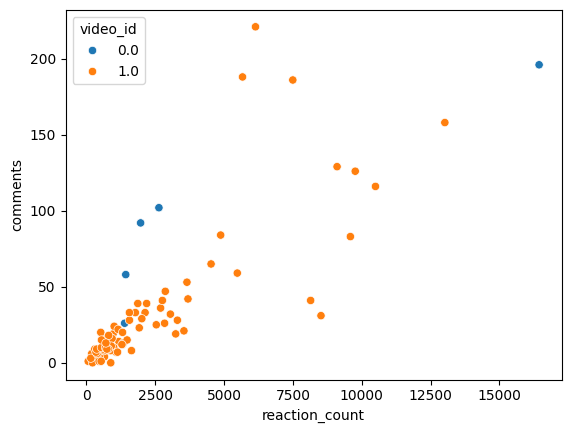

In [15]:
# mối quan hệ giữa comment và react, lọc với video/image
sns.scatterplot(data = df[['reaction_count', 'comments', 'video_id']], x = 'reaction_count', y = 'comments', hue = 'video_id')

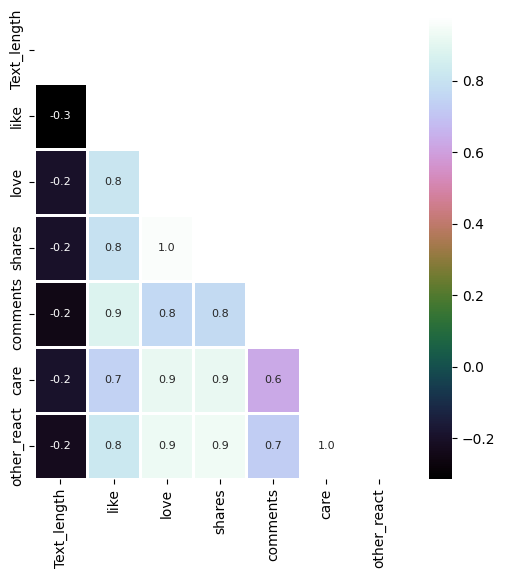

In [16]:
# biểu độ heatmap thể hiện tương quan các đại lượng

df['Text_length'] = df.text.str.split().str.len()
df_heat = df[['Text_length', 'like', 'love', 'shares', 'comments', 'care', 'other_react']]

df_heat = df_heat[
    (df_heat['comments'] <= df_heat['comments']) &
    (df_heat['love'] >= df_heat['love'].quantile(0.025)) &
    (df_heat['shares'] <= df_heat['shares'].quantile(0.975)) &
    (df_heat['like'] >= df_heat['like'].quantile(0.025)) &
    (df_heat['care'] >= df_heat['care'].quantile(0.025)) &
    (df_heat['other_react'] >= df_heat['other_react'].quantile(0.025))
    ]

corr = df_heat.corr(method="pearson")

    # Generate a mask for the upper triangle
mask = np.triu(corr)



    # Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6,6))


    # Draw the heatmap with 'sns.heatmap()'
ax = sns.heatmap(data=corr, 
            mask=mask, 
            annot=True,
           cmap="cubehelix",
            fmt=".1f",
           annot_kws={"fontsize":8},
                linewidths=1)


In [17]:
def get_comments(text):
    pattern = r"\{[^{}]*\}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result

In [18]:
# Tạo df mới cho comment 
df_cmt = {"comment_id" : [],
            "commenter_id" : [],
            "comment_text" : [],
            "comment_time" : [],
            "commenter_name" : [],
            "commenter_url" : []}
    
new_df = df[~df["comments_full"].isna()]
for index, rows in new_df.iterrows():
    x = rows["comments_full"]
    for comment in get_comments(x):
        try:
            df_cmt['comment_id'].append(comment['comment_id'])
            df_cmt['commenter_id'].append(comment['commenter_id'])
            df_cmt['comment_text'].append(comment['comment_text'])
            df_cmt['comment_time'].append(comment['comment_time'])
            df_cmt['commenter_name'].append(comment['commenter_name'])
            df_cmt['commenter_url'].append(comment['commenter_url'])
        except:
            continue
df_cmt = pd.DataFrame(df_cmt)
df_cmt

,comment_id,commenter_id,comment_text,comment_time,commenter_name,commenter_url
0,1073502340502070,100069865607132,"Beautiful, success and good luck☘️",2023-11-14 21:00:00,Yunior Verdecia,https://facebook.com/profile.php?id=1000698656...
1,887818429609684,100008624523820,Wow!,2023-11-14 22:00:00,Marjorie Aduan,https://facebook.com/marjorie.aduan.3?eav=AfZq...
2,1422691858657649,100001070302383,gunes ❤️,2023-11-14 21:00:00,Aya Naimi,https://facebook.com/cewe.lampunk?eav=Afb23ug-...
3,1864703883987567,100092039563915,Hermosa,2023-11-14 22:00:00,Rodolfo Rivero,https://facebook.com/profile.php?id=1000920395...
4,309655975198679,100001468987574,#RanTakahashi is brimming with potential and t...,2023-11-14 21:00:00,Aileen Espallardo,https://facebook.com/aiayenelleaisles.espallar...
...,...,...,...,...,...,...
970,171556269350922,100009983071106,Osmany Juantorena 🇨🇺🇨🇺💪💪💪,2023-10-26 00:00:00,Eduardo Heras,https://facebook.com/profile.php?id=1000099830...
971,847440470290776,100002052258870,Wow,2023-10-26 00:00:00,MrCharles,https://facebook.com/charlesbainkabel?eav=AfZN...
972,289267867348916,100000818454250,Israel is a country that occupies Palestine an...,2023-10-26 00:00:00,Abdallah Mohamed Mohamed,https://facebook.com/tamer.mohamed.73550794?ea...
973,345772021302701,100008268424020,Rim Magar Ido,2023-10-26 00:00:00,Rim Magar Ido,https://facebook.com/rimmagarpokhera.kaski?eav...


<Axes: title={'center': 'Tổng số lượng comment các ngày trong tuần'}, xlabel='day'>

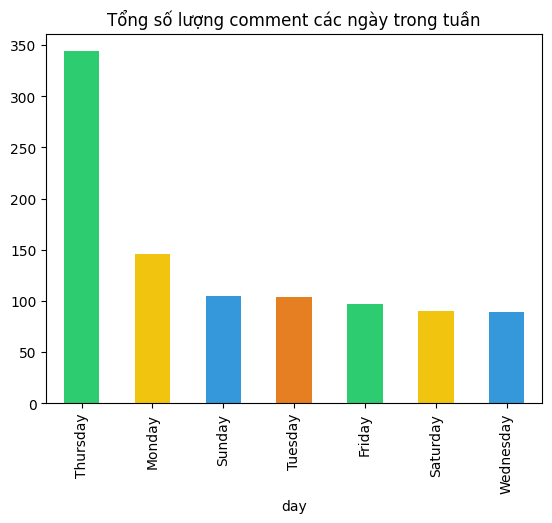

In [19]:
df_cmt['comment_time'] = pd.to_datetime(df_cmt['comment_time'])
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_cmt['day'] = df_cmt['comment_time'].apply(lambda x: week_day[x.weekday()])
df_cmt['day'].value_counts().plot(kind = 'bar', color = ['#2ecc71', '#f1c40f', '#3498db', '#e67e22'], title = 'Tổng số lượng comment các ngày trong tuần')

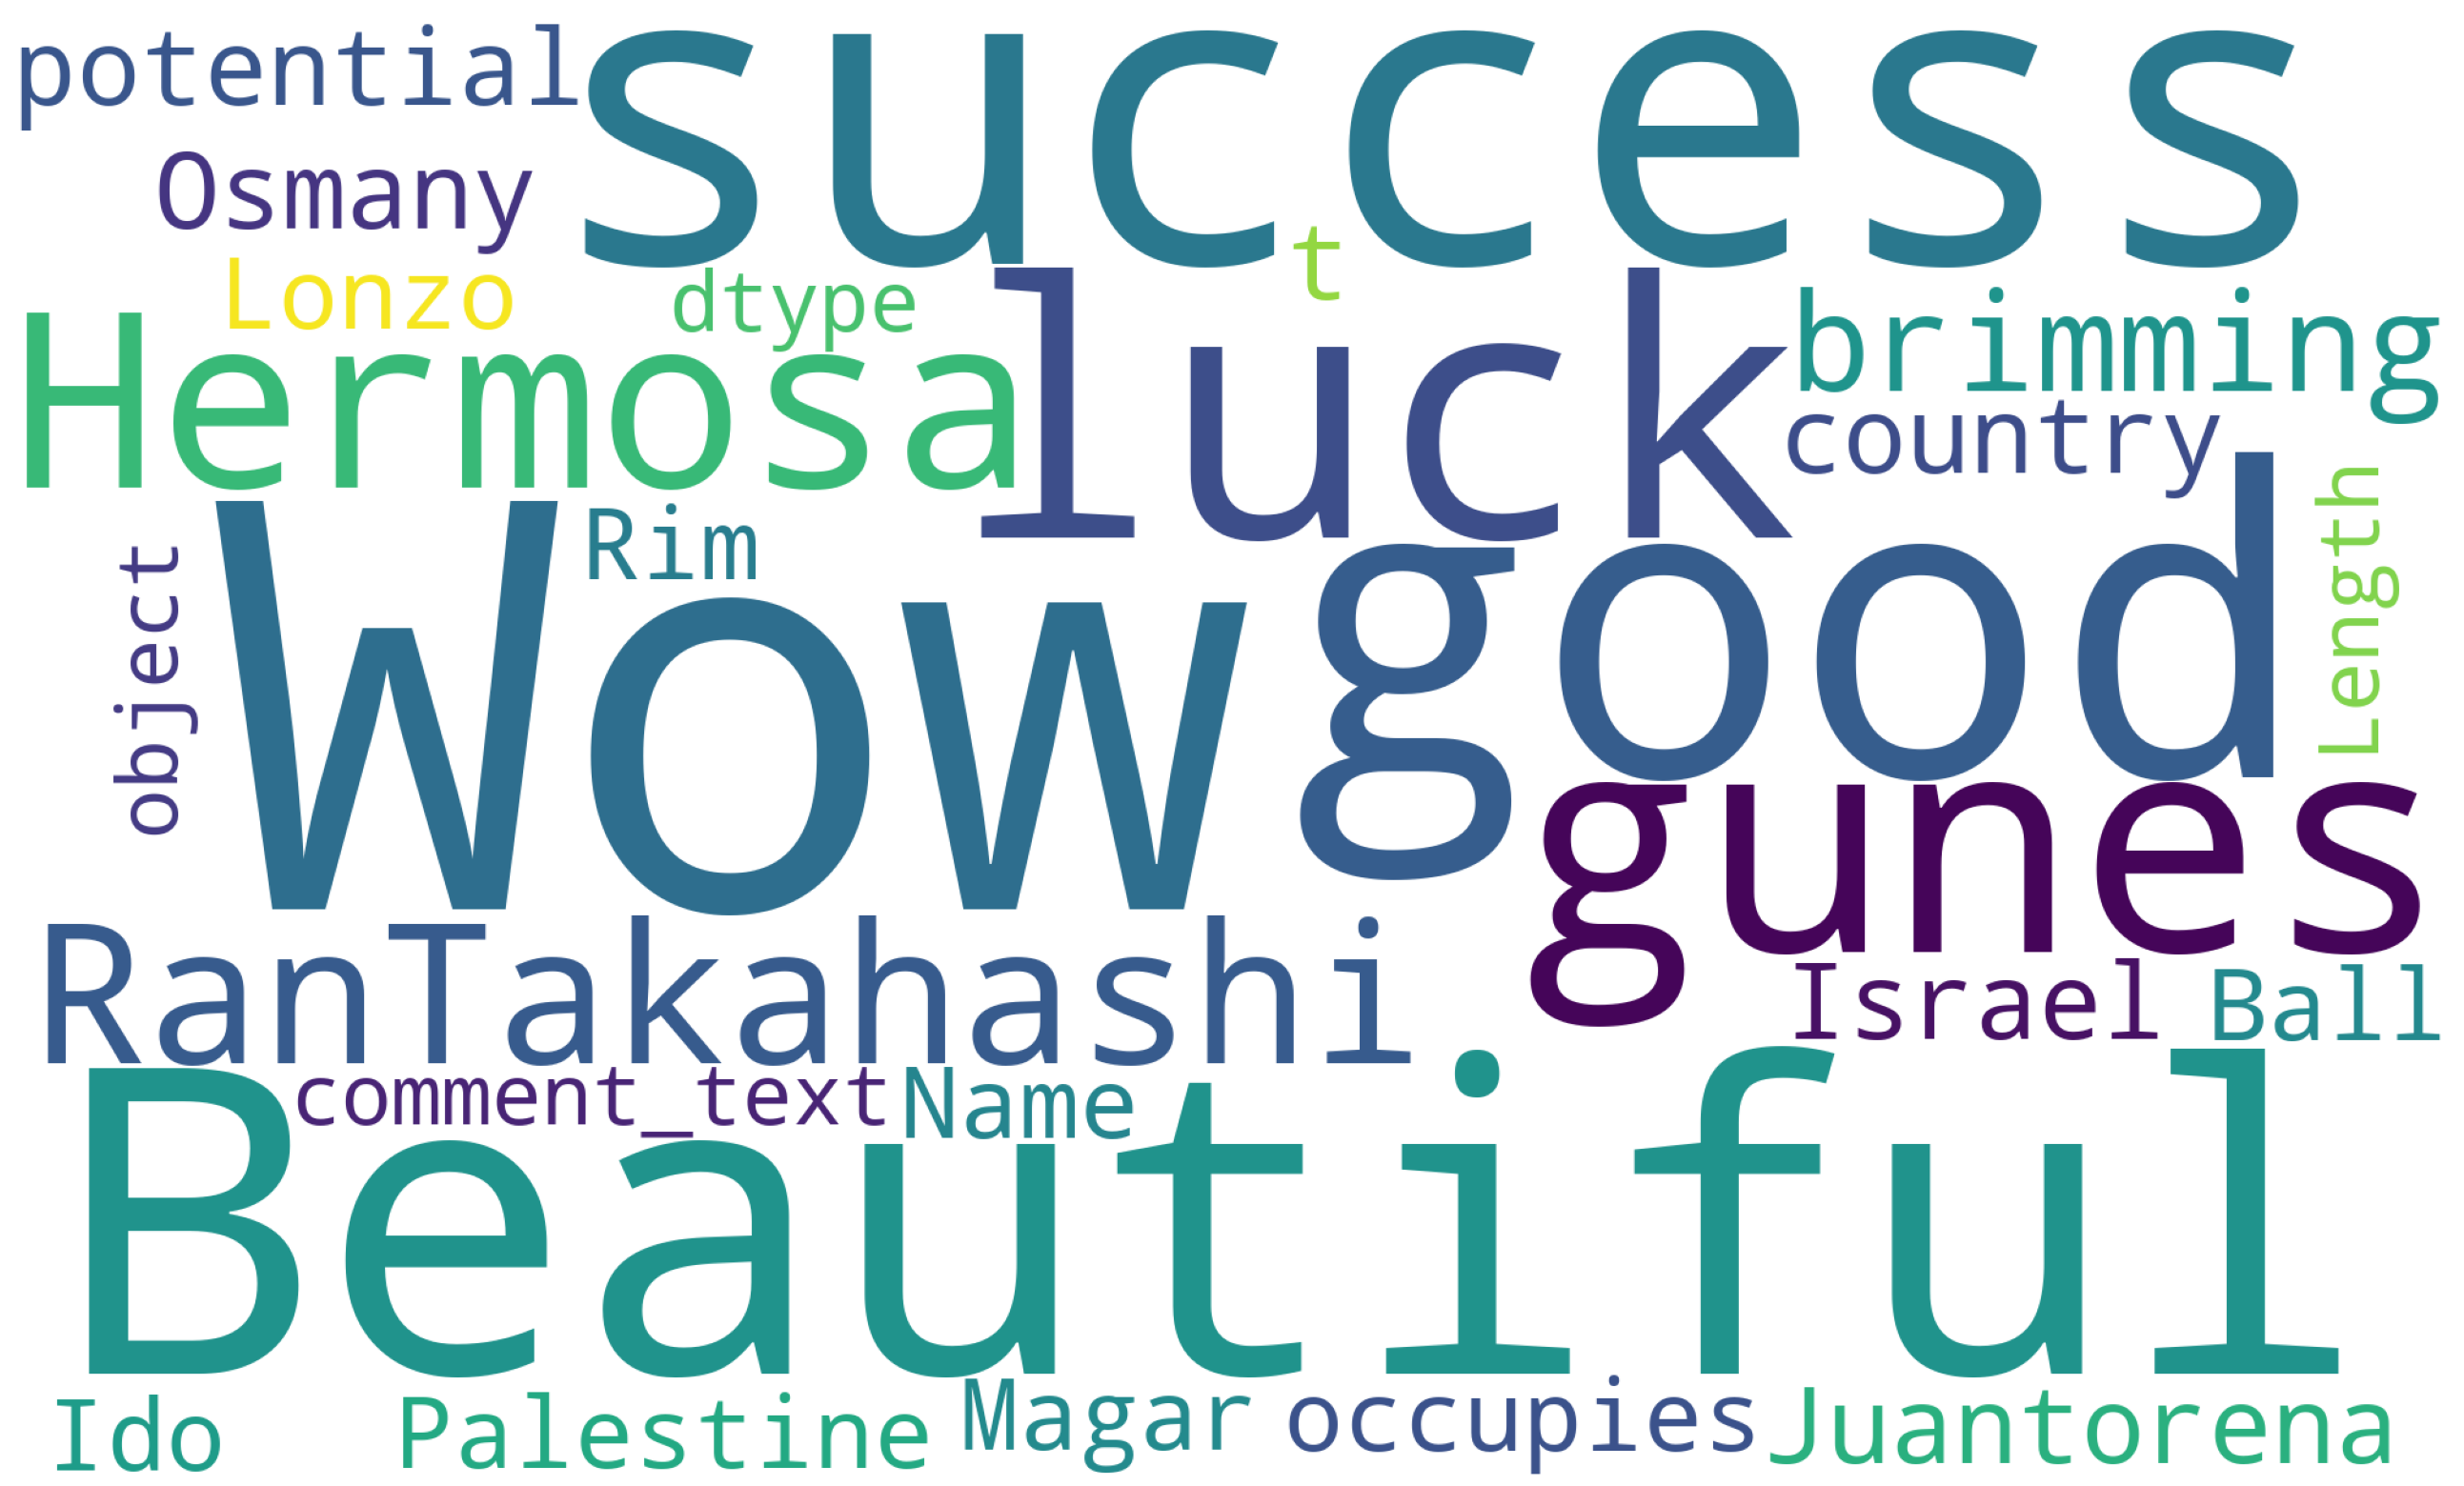

In [20]:
from wordcloud import WordCloud, STOPWORDS

df_text = df_cmt[['comment_text']]
text = str(df_text['comment_text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [21]:
df_cmt['commenter_name'].value_counts().head(10)

commenter_name
MrCharles              38
Apisit Thongnoy        18
Nurses Cara            18
Lisa Chris             15
Sonia Natalia          11
Vaeagi Pauli Ah Loo     8
Maijung Pmsee           8
Raymond Eo Patrick      7
María Isabel Gil        6
Sell Man                6
Name: count, dtype: int64

In [22]:
from facebook_scraper import get_profile

FANPAGE_LINK ="VolleyballWorld"
FOLDER_PATH = "Data/"
COOKIE_PATH = "./cookies.txt"


In [23]:
id_list = df_cmt['commenter_id']

In [24]:
profile_list = []
for i in range(101,150):
  
    prf = get_profile(id_list[i], cookies = COOKIE_PATH)
    print(prf)
    profile_list.append(prf)
    


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\facebook_scraper\facebook_scraper.py:912: UserWarning: Facebook says 'Unsupported Browser'
  warnings.warn(f"Facebook says 'Unsupported Browser'")


TemporarilyBanned: You’re Temporarily Blocked

In [27]:
commenter = pd.read_csv('Data/profile.csv')
commenter2 = pd.read_csv('Data/profile2.csv')
commenter3 = pd.read_csv('Data/profile3.csv')

In [32]:
male = commenter['Basic info'].str.count("Male").sum()+  commenter2['Basic info'].str.count("Male").sum() + commenter3['Basic info'].str.count("Male").sum()
female = commenter['Basic info'].str.count("Female").sum()+  commenter2['Basic info'].str.count("Female").sum() + commenter3['Basic info'].str.count("Female").sum()

([<matplotlib.patches.Wedge at 0x1f0768a85d0>,
 [Text(0.18425686014010956, 1.084458117905578, 'Male'),
  Text(-0.18425696167440536, -1.084458100654201, 'Female')],
 [Text(0.1005037418946052, 0.5915226097666788, '45%'),
  Text(-0.10050379727694837, -0.5915226003568368, '55%')])

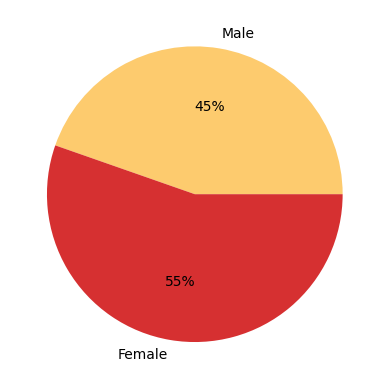

In [44]:
data = [male, female]
plt.pie(data,labels= ['Male', 'Female'], colors = ['#fdcb6e', '#d63031'] ,autopct='%.0f%%')

In [ ]:
columns_of_interest = ['Friend_count', 'Follower_count', 'Following_count', 'profile_picture', 'id', 'Name', 'Công việc', 'Nơi từng sống', 'cover_photo', 'Học vấn']
file_paths = ['Data/user_profiles.csv', 'Data/user_profiles2.csv', 'Data/user_profiles3.csv', 'Data/user_profiles4.csv',
              'Data/user_profiles5.csv', 'Data/user_profiles6.csv', 'Data/user_profiles7.csv', 'Data/user_profiles8.csv',
              'Data/user_profiles9.csv', 'Data/user_profiles10.csv', 'Data/user_profiles11.csv', 'Data/user_profiles12.csv','Data/user_profiles13.csv','Data/user_profiles14.csv']

dfs = [pd.read_csv(file_path, usecols=columns_of_interest) for file_path in file_paths]
df_user = pd.concat(dfs, ignore_index=True)


# Analyze text

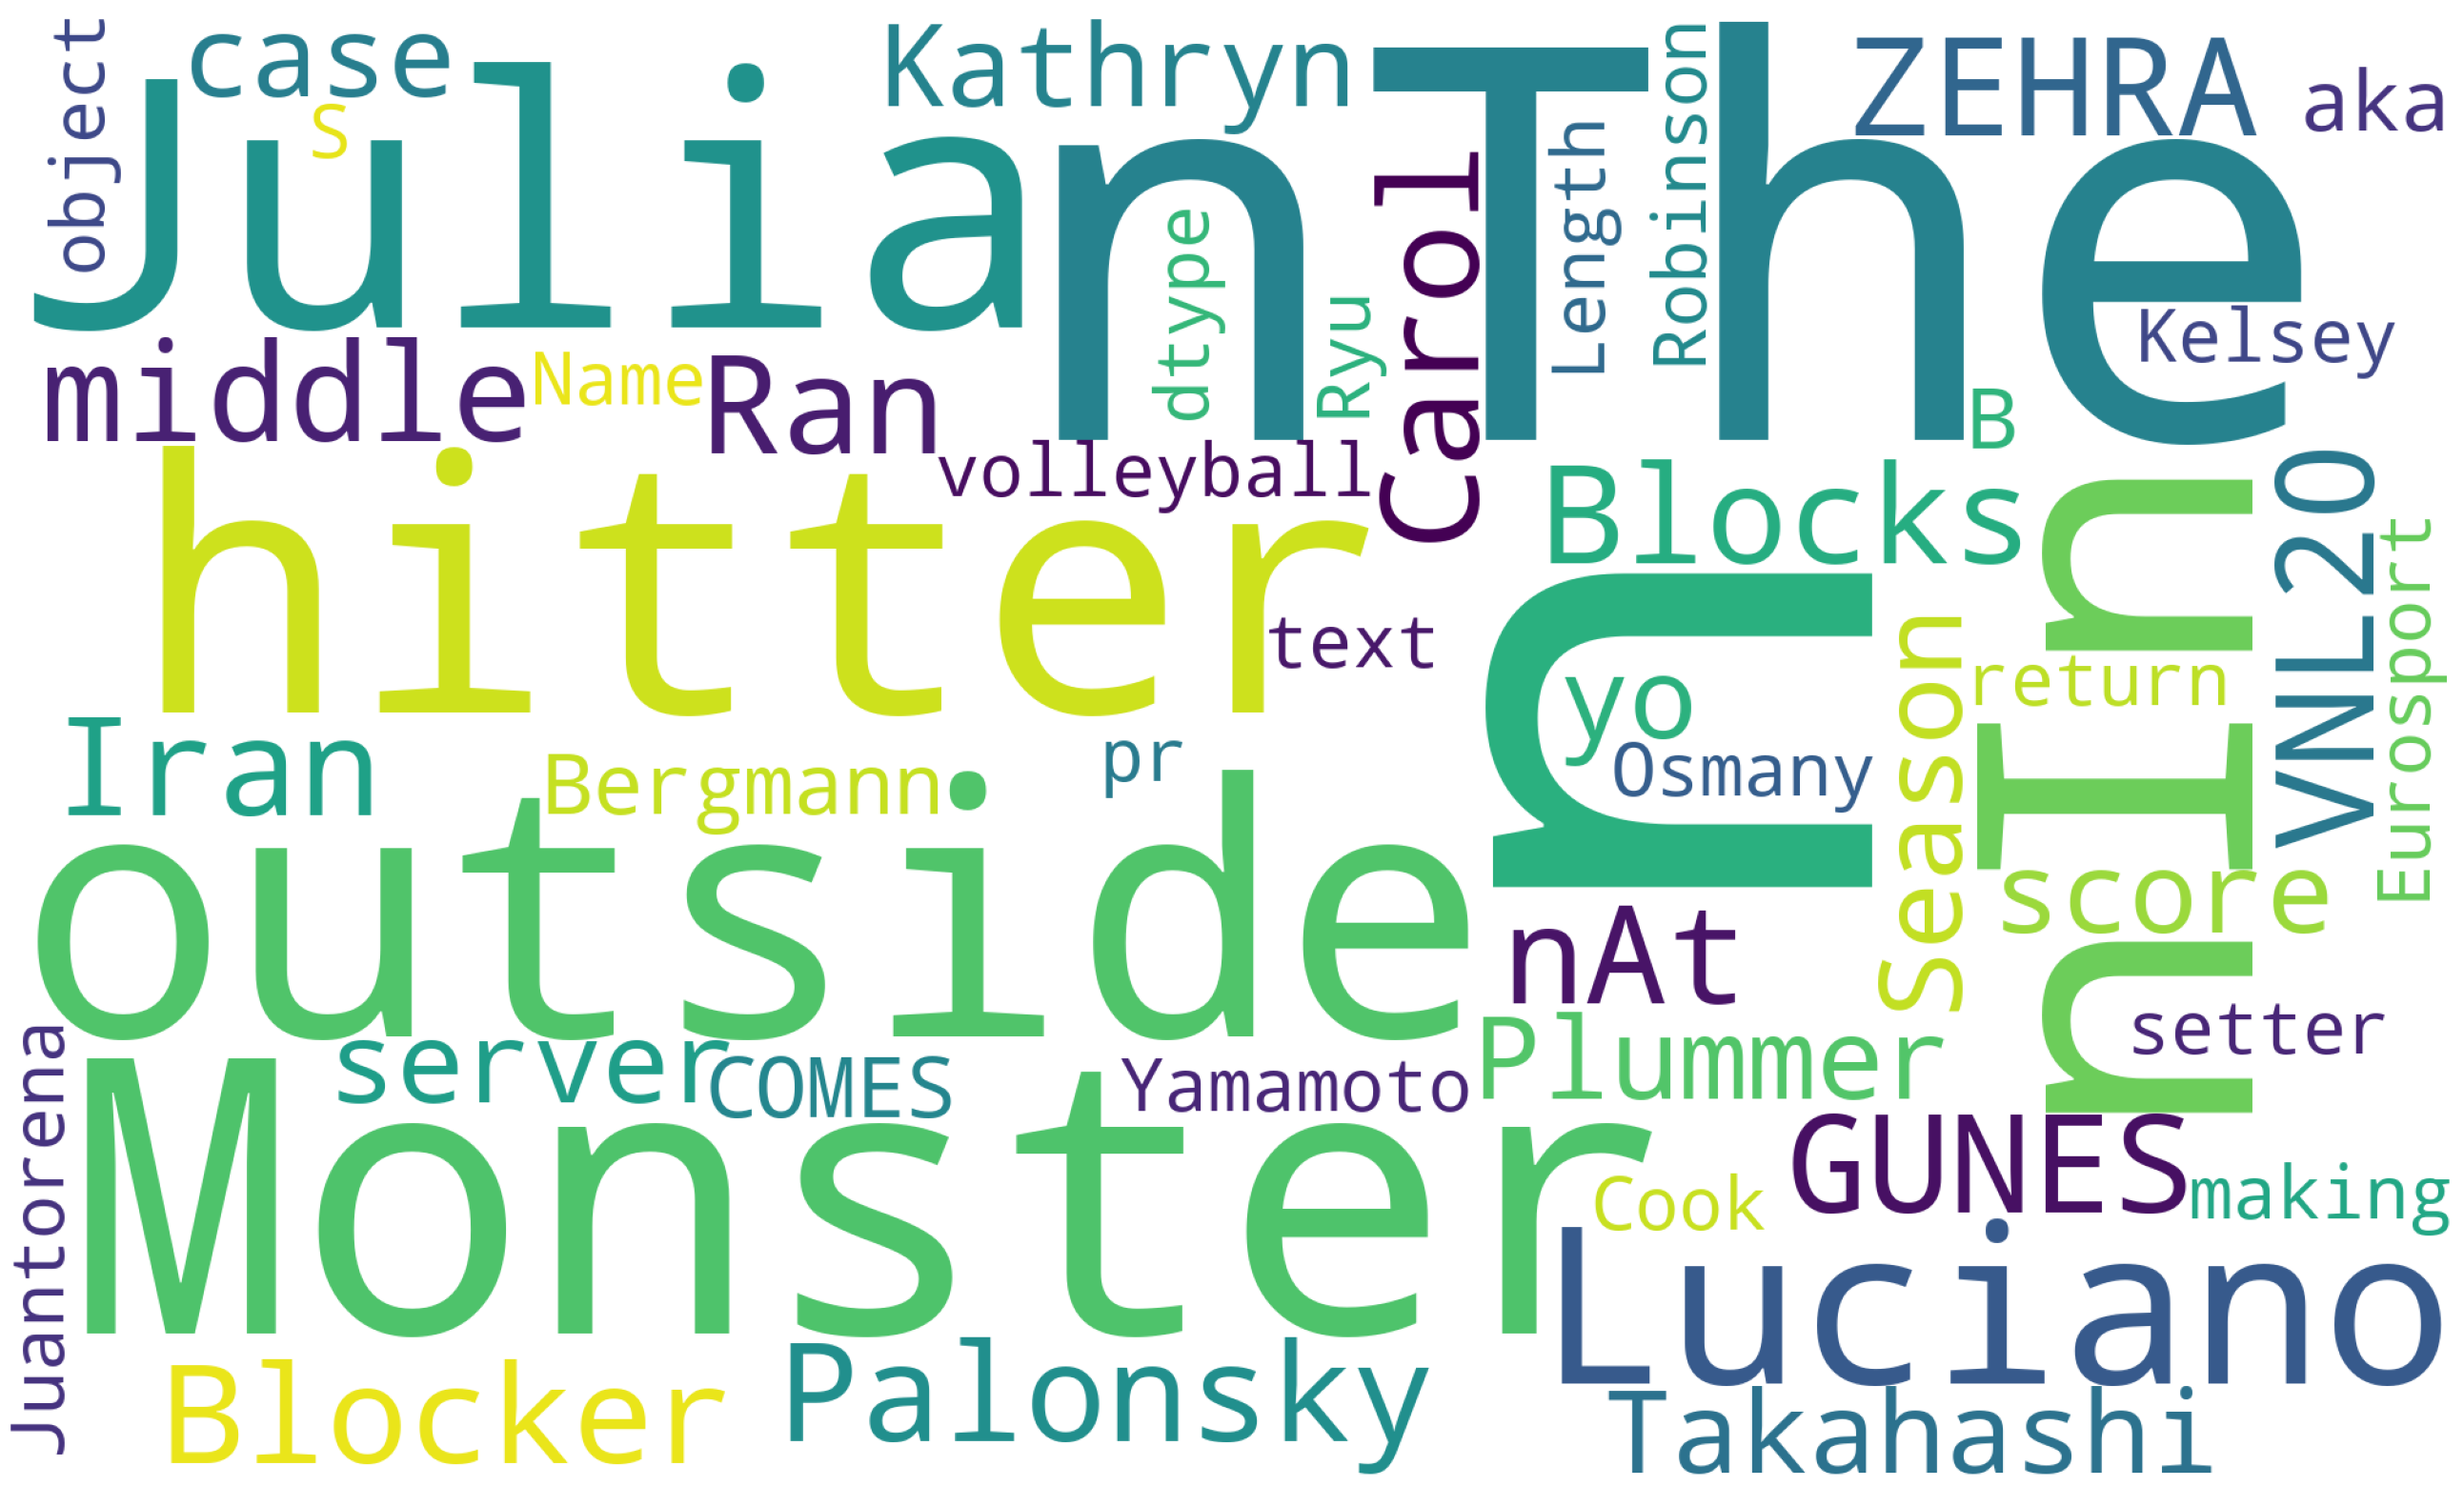

In [22]:
# cátừ khoá xuất hiện trong bài viết 
from wordcloud import WordCloud, STOPWORDS

df_text = df[['text']]
text = str(df_text['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

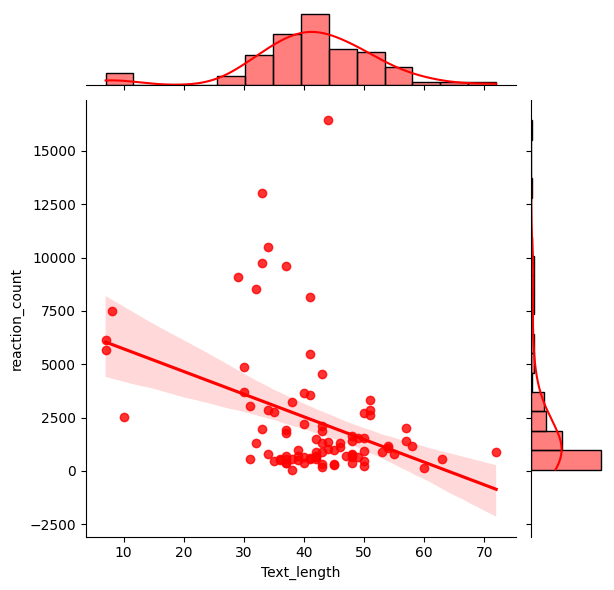

In [29]:
# tương quan giữa độ dài bài viết với lượng reaction
sns.jointplot(x= 'Text_length', y= 'reaction_count', kind= 'reg', data= df[['Text_length','reaction_count']], color = 'red')

2382.011111111111

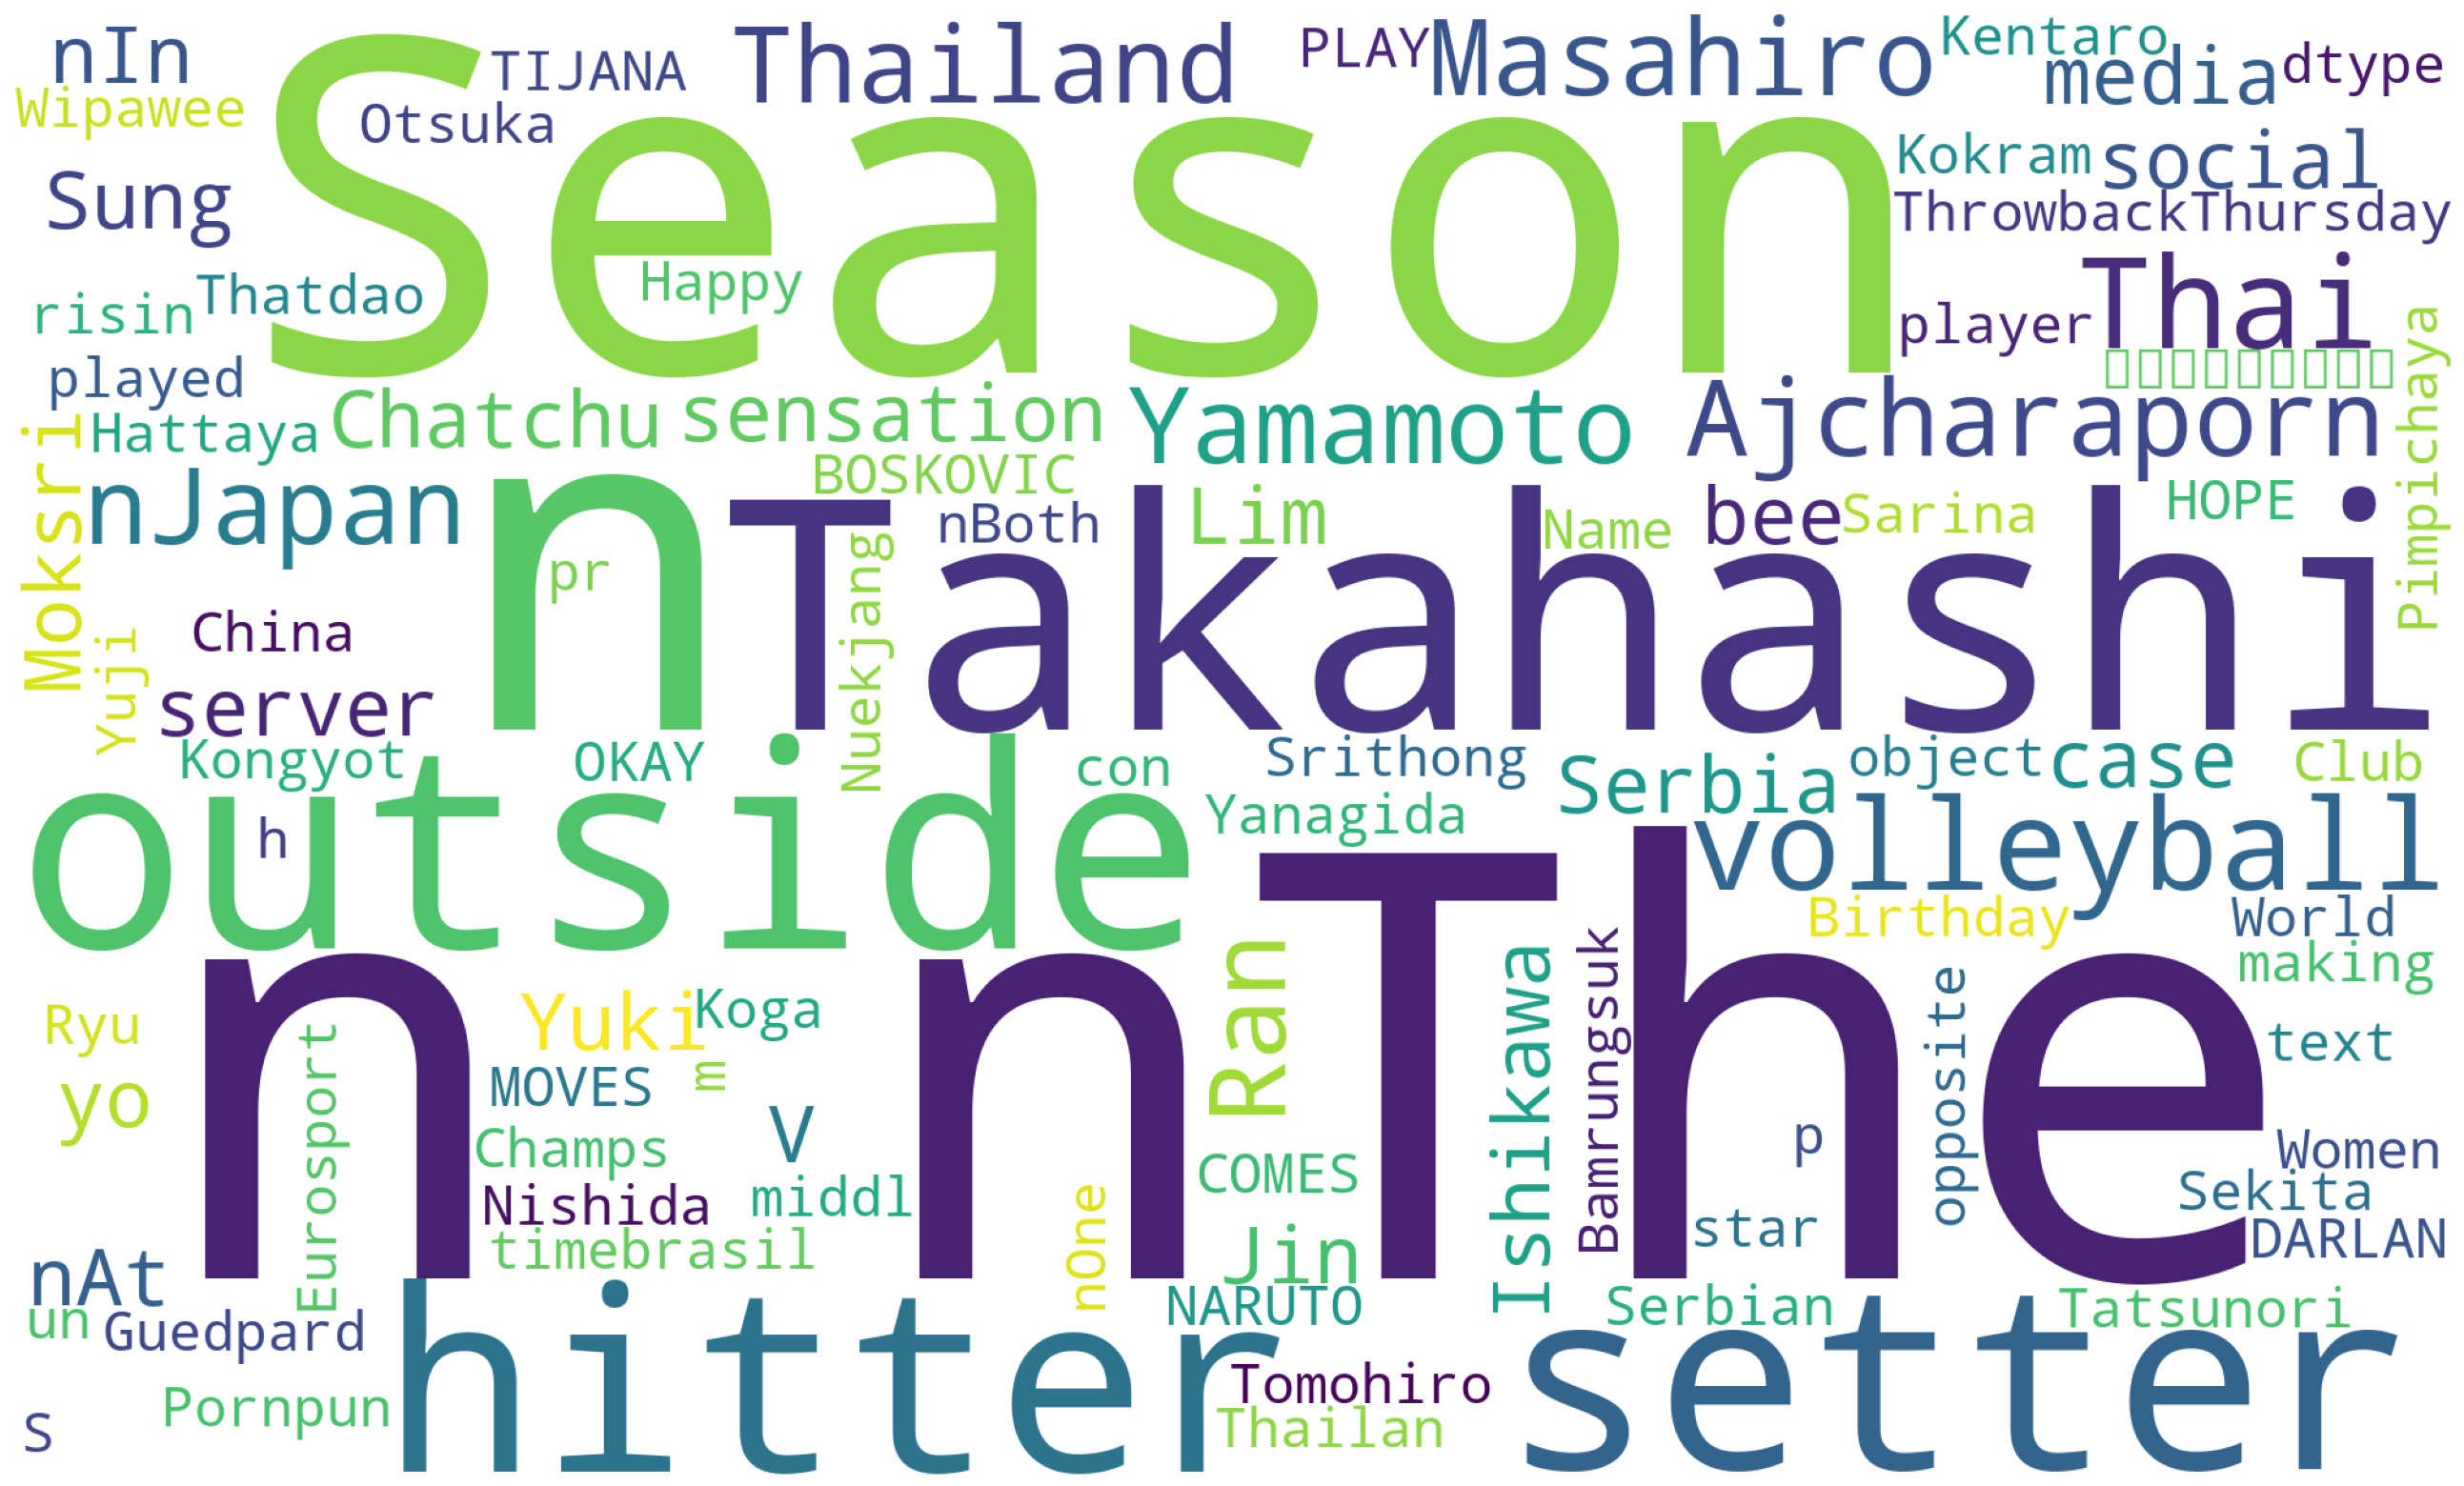

In [49]:
df2 = df.loc[df['reaction_count'] > df['reaction_count'].mean()]
from wordcloud import WordCloud, STOPWORDS

df_text = df2[['text']]
text = str(df_text['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()